# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [10]:
import pandas as pd

data = pd.read_json("./05_clean_data.json.zip")

In [11]:
data

,instance,#Variables,#Clauses,iteration_info,baseline_alg,initial_sample_path,initial_sample_size,lower_bound,optimized_sample_size
0,email,10,17,"[{'nbrhd_tuples': 70, 'nbrhd_confs': 8, 'itera...",FIDE-YASA(m=1),2023-03-01_13-51-03/3_1_3_5_sample.csv,8,6,6
1,ChatClient,14,20,"[{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/4_1_3_1_sample.csv,10,7,7
2,ChatClient,14,20,"[{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/4_1_3_2_sample.csv,10,7,7
3,ChatClient,14,20,"[{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/4_1_3_3_sample.csv,10,7,7
4,ChatClient,14,20,"[{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/4_1_3_4_sample.csv,10,7,7
...,...,...,...,...,...,...,...,...,...
1933,berkeleyDB2,119,346,"[{'nbrhd_tuples': 198, 'nbrhd_confs': 10, 'ite...",Incling,2023-03-01_13-51-03/20_1_2_5_sample.csv,28,11,12
1934,soletta_2015-06-26_18-38-56,129,192,"[{'nbrhd_tuples': 223, 'nbrhd_confs': 22, 'ite...",Incling,2023-03-01_13-51-03/21_1_2_1_sample.csv,44,24,24
1935,soletta_2015-06-26_18-38-56,129,192,"[{'nbrhd_tuples': 227, 'nbrhd_confs': 22, 'ite...",Incling,2023-03-01_13-51-03/21_1_2_2_sample.csv,44,24,24
1936,soletta_2015-06-26_18-38-56,129,192,"[{'nbrhd_tuples': 193, 'nbrhd_confs': 21, 'ite...",Incling,2023-03-01_13-51-03/21_1_2_3_sample.csv,44,24,24


We extend the values by the best values we know.

In [12]:
# Find the best values for each instance as reference.
best_solutions = (
    data[["instance", "initial_sample_size", "optimized_sample_size"]]
    .groupby("instance")
    .min()
    .reset_index()
    .rename(
        columns={
            "initial_sample_size": "best_baseline",
            "optimized_sample_size": "best_lns_ub",
        }
    )
)
best_lb = (
    data[["instance", "lower_bound"]]
    .groupby("instance")
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lb"})
)
best_values = best_solutions.merge(best_lb, left_on="instance", right_on="instance")
best_values

,instance,best_baseline,best_lns_ub,best_lb
0,APL,9,7,7
1,APL-Model,10,8,8
2,BankingSoftware,40,29,28
3,BattleofTanks,444,331,256
4,ChatClient,8,7,7
5,DMIE,25,16,16
6,E-Shop,20,12,9
7,EMBToolkit,1883,1876,1872
8,FameDB,8,8,8
9,FeatureIDE,11,8,7


In [13]:
# add them to the data as reference
data = data.merge(best_values, left_on="instance", right_on="instance")

In [14]:
# instances that have been solved by all algorithms
instances_intersection = None
for instances in data.groupby(["baseline_alg"])["instance"].unique().to_list():
    if instances_intersection is None:
        instances_intersection = set(instances)
    else:
        instances_intersection &= set(instances)
len(instances_intersection)

25

In [15]:
t = (
    data.groupby(["instance", "baseline_alg"])[
        ["initial_sample_size", "best_lb", "optimized_sample_size"]
    ]
    .mean()
    .reset_index()
)
# t = t[t["instance"].isin(instances_intersection)]
t["sort_key"] = t.apply(
    (
        lambda row: (
            row["baseline_alg"].split("(")[0][::-1],
            len(row["baseline_alg"]),
            row["baseline_alg"],
        )
    ),
    axis=1,
)
t["ub_1"] = 100 * (t["initial_sample_size"] / t["best_lb"] - 1)
t["ub_2"] = 100 * (t["optimized_sample_size"] / t["best_lb"] - 1)
t1 = t.copy()
t1.rename(columns={"ub_1": "ub"}, inplace=True)
t1["SampLNS"] = "Without SampLNS"
t2 = t.copy()
t2.rename(columns={"ub_2": "ub"}, inplace=True)
t2["SampLNS"] = "With SampLNS"
t1.sort_values(by="sort_key", inplace=True)
t2.sort_values(by="sort_key", inplace=True)
t = pd.concat([t1, t2], ignore_index=True).drop(
    columns=["ub_1", "ub_2", "initial_sample_size"]
)
t = t[~t["baseline_alg"].str.contains("FIDE-YASA")]
t["baseline_alg"] = t["baseline_alg"].apply(lambda s: s.split("-")[-1])

In [16]:
t

,instance,baseline_alg,best_lb,optimized_sample_size,sort_key,ub,SampLNS
0,FeatureIDE,YASA(m=1),7.0,8.0,"(ASAY, 9, YASA(m=1))",71.428571,Without SampLNS
1,busybox_2007-01-24_09-14-09,YASA(m=1),21.0,21.2,"(ASAY, 9, YASA(m=1))",85.714286,Without SampLNS
2,FreeBSD-8_0_0,YASA(m=1),29.0,65.0,"(ASAY, 9, YASA(m=1))",179.310345,Without SampLNS
3,busybox_2020-12-16_21-53-05,YASA(m=1),19.0,22.4,"(ASAY, 9, YASA(m=1))",105.263158,Without SampLNS
4,soletta_2015-06-26_18-38-56,YASA(m=1),24.0,24.0,"(ASAY, 9, YASA(m=1))",33.333333,Without SampLNS
...,...,...,...,...,...,...,...
853,soletta_2017-03-09_21-02-40,Chvatal,37.0,37.0,"(latavhC-EDIF, 12, FIDE-Chvatal)",0.000000,With SampLNS
854,FameDB,Chvatal,8.0,8.0,"(latavhC-EDIF, 12, FIDE-Chvatal)",0.000000,With SampLNS
855,busybox_2007-01-24_09-14-09,Chvatal,21.0,22.2,"(latavhC-EDIF, 12, FIDE-Chvatal)",5.714286,With SampLNS
856,busybox_2020-12-16_21-53-05,Chvatal,19.0,22.6,"(latavhC-EDIF, 12, FIDE-Chvatal)",18.947368,With SampLNS


In [17]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

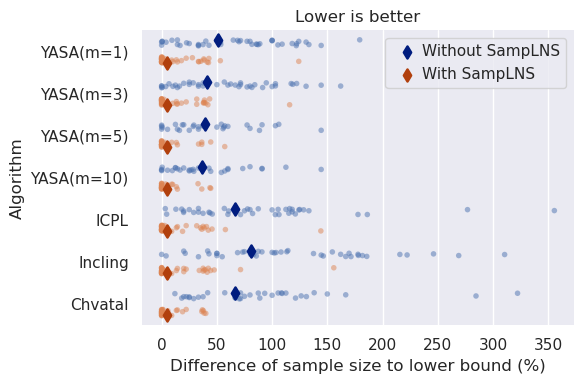

In [18]:
sns.despine(bottom=True, left=True)
sns.stripplot(
    data=t,
    y="baseline_alg",
    x="ub",
    hue="SampLNS",
    dodge=True,
    alpha=0.5,
    zorder=1,
    legend=False,
    size=4,
    jitter=0.15,
)
sns.pointplot(
    data=t[t["instance"].isin(instances_intersection)],
    x="ub",
    y="baseline_alg",
    hue="SampLNS",
    join=False,
    dodge=0.8 - 0.8 / 3,
    palette="dark",
    markers="d",
    scale=0.9,
    errorbar=None,
)
sns.move_legend(
    ax,
    loc="upper right",
    ncol=1,
    frameon=True,
    columnspacing=1,
    handletextpad=0,
    title=None,
)
plt.title("Lower is better")
plt.xlabel("Difference of sample size to lower bound (%)")
plt.ylabel("Algorithm")
plt.tight_layout()
plt.savefig("./plots/01_11_how_much_above_lb_stripplot.pdf")
plt.show()

In [19]:
t[t["instance"].isin(instances_intersection)].groupby(["baseline_alg", "SampLNS"])[
    ["ub"]
].mean()

ub
baseline_alg SampLNS                   
Chvatal      With SampLNS      4.600922
             Without SampLNS  66.550649
ICPL         With SampLNS      4.879231
             Without SampLNS  66.135491
Incling      With SampLNS      4.738176
             Without SampLNS  80.591625
YASA(m=1)    With SampLNS      4.430707
             Without SampLNS  51.183951
YASA(m=10)   With SampLNS      4.927402
             Without SampLNS  36.239631
YASA(m=3)    With SampLNS      4.676768
             Without SampLNS  41.458388
YASA(m=5)    With SampLNS      4.839005
             Without SampLNS  39.234104

In [20]:
t_ = (
    t[t["instance"].isin(instances_intersection)]
    .groupby(["instance", "baseline_alg", "SampLNS"])[["ub"]]
    .mean()
)
t_["c"] = t_["ub"] == 0.0
t_.reset_index().groupby(["baseline_alg", "SampLNS"])[["c"]].sum()

c
baseline_alg SampLNS            
Chvatal      With SampLNS     18
             Without SampLNS   0
ICPL         With SampLNS     17
             Without SampLNS   0
Incling      With SampLNS     17
             Without SampLNS   1
YASA(m=1)    With SampLNS     17
             Without SampLNS   2
YASA(m=10)   With SampLNS     17
             Without SampLNS   3
YASA(m=3)    With SampLNS     17
             Without SampLNS   3
YASA(m=5)    With SampLNS     17
             Without SampLNS   3

In [21]:
t_ = (
    t[t["instance"].isin(instances_intersection)]
    .groupby(["instance", "baseline_alg", "SampLNS"])[["ub"]]
    .mean()
)
t_["c"] = t_["ub"] <= 20.0
t_.reset_index().groupby(["baseline_alg", "SampLNS"])[["c"]].sum()

c
baseline_alg SampLNS            
Chvatal      With SampLNS     23
             Without SampLNS   3
ICPL         With SampLNS     23
             Without SampLNS   3
Incling      With SampLNS     23
             Without SampLNS   2
YASA(m=1)    With SampLNS     23
             Without SampLNS   5
YASA(m=10)   With SampLNS     23
             Without SampLNS  10
YASA(m=3)    With SampLNS     23
             Without SampLNS   8
YASA(m=5)    With SampLNS     23
             Without SampLNS   9